In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import glob

In [43]:
## uni = file name
uni = "vtx"

path = "/users/hep/yewzzang/work/KNO_reconstruction/combined/result_vtx/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]

In [44]:
for i in range(len(train_list)):
    print(np.sort(np.array(train_list))[i].split('/')[-2])

vtx_infpadding_1_64_8_64_200_3l
vtx_nopadding_1_64_8_64_200_3l
vtx_padding_1_128_8_128_200_3l
vtx_padding_1_32_4_32_200_3l
vtx_padding_1_32_4_64_200_3l
vtx_padding_1_64_2_64_200_3l
vtx_padding_1_64_4_128_200_3l
vtx_padding_1_64_4_64_200_3l
vtx_padding_1_64_8_64_100_3l
vtx_padding_1_64_8_64_200_3l
vtx_padding_1_64_8_64_200_7l


In [45]:
train_list = ['/users/hep/yewzzang/work/KNO_reconstruction/combined/result_vtx/vtx_padding_1_64_8_64_200_3l/train.csv',
]



0 9  /  MTL = 0.0069776  /  MTL epoch = 0009  /  0.0059000  /  MVL = 0.0059000  /  MVL epoch = 0008  /  vtx_padding_1_64_8_64_200_3l


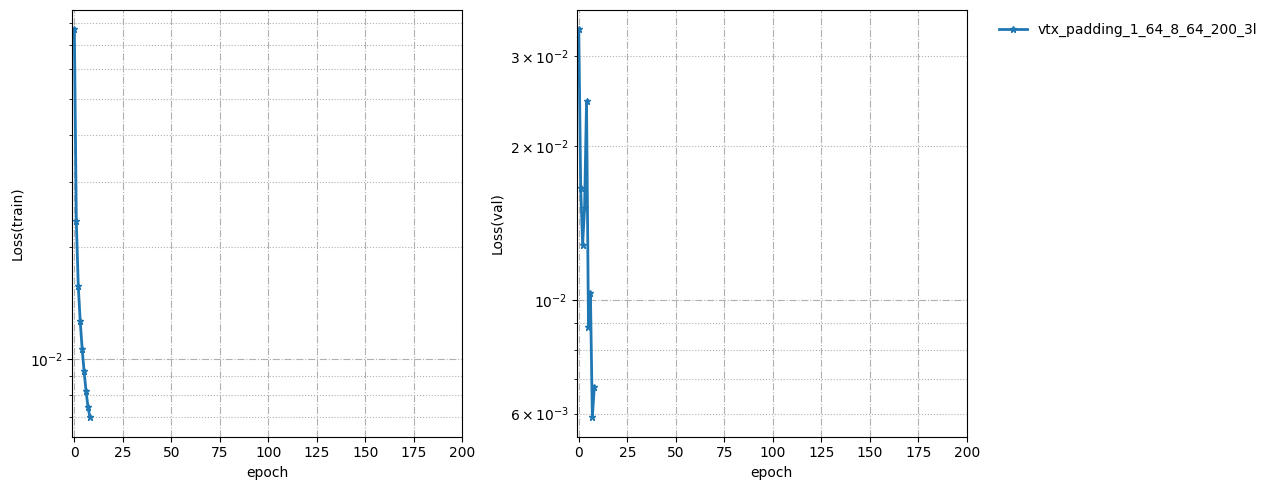

In [46]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

ax1 = plt.subplot(1, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(1, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')

for ax in (ax1, ax2):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([-1,200])

lines, labels = [], []

for i in range(len(train_list)):
    df = pd.read_csv(train_list[i])
    
    label = train_list[i]
    # label = labelss[i]
    l =  ax1.plot(df['loss'],'*-', linewidth=2) 
    ax2.plot(df['val_loss'], '*-', linewidth=2,label=label.split('/')[-2])
    # ax2.plot(df['val_loss'], linewidth=2,label=label)
    
    # if df['val_loss'][0] < 250:

    #     print(df['val_loss'][0])
    #     print(label)
    print(i,
        len(df['loss']),
        ' / ',
        "MTL = " + f"{df['loss'].min():.7f}",
        " / ",
        "MTL epoch = " + str("{:04}".format(1+np.where(df['loss']==df['loss'].min())[0][0])),
        " / ",
        f"{df['val_loss'].min():.7f}",
        " / ",
        "MVL = " + f"{df['val_loss'].min():.7f}",
        " / ",
        "MVL epoch = " + str("{:04}".format(1+np.where(df['val_loss']==df['val_loss'].min())[0][0])),
        " / ",
        # labelss)
        label.split('/')[-2])

    lines.append(l[0])
    labels.append(label)
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1))
plt.show()
plt.close()